In [1]:
import numpy as np
import scipy.constants as constants
import matplotlib.pyplot as plt
import matplotlib
import os

import detailedbalance as db

font = {'size' : 22}

matplotlib.rc('font',**font)
%matplotlib inline

In [2]:
# Just some constants for the upcoming math
c = constants.value('speed of light in vacuum')
h = constants.value('Planck constant in eV s')
e = constants.value('elementary charge')
k = constants.value('Boltzmann constant in eV/K')

pi = 3.1415

# Globals
Tcell = 300  # Kelvin
# Energy Gap
Egap = 1.1  #electron volts

r_earth = 6e6
r_sun = 6.95e8
d_sun = 1.50e11

In [3]:
E_ph = np.arange(0.01, 10,0.01) 
E_ph = np.flip(E_ph,0)

E_gaps = np.arange(0.3, 5,0.01) 
E_gaps = np.flip(E_gaps,0)

sourcetype = 0 

constants = {}

# sourcetype 1 for sun and 0 for full angle. This should perhaps be combined with the max_eff_temp function
if(sourcetype):
    constants['Temp'] = 5750
    constants['powfactor'] = 1
    constants['solidangle'] = db.solid_angle_sun(r_earth,d_sun)
    constants['emitterarea'] = 4*pi*r_sun**2
    constants['absorberarea'] = pi*r_earth**2
else:
    constants['Temp'] = 2500
    constants['powfactor'] = 1
    constants['solidangle'] = 2*pi
    constants['emitterarea'] = 1
    constants['absorberarea'] = 1
    
#constants['emissivity'] = db.gen_emissivity(0.1,1,1.1,E_ph)
constants['emissivity'] = db.lor_emissivity(0.1,1,1.25,0.1,E_ph)
   
BB = db.gen_spectrum(E_ph,constants)
BB_ph = db.power_to_photons(BB)

#check integrated irradiance is ~1kW/m^2
integrate = -np.trapz(BB[:,1],BB[:,0] )
print(integrate)

print(db.stephan(5750)*4*pi*r_sun**2)

241036.42979623476
3.762263521545546e+26


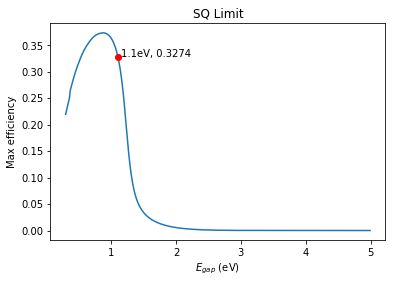

In [4]:
db.sq_limit_plot(BB_ph,E_gaps)

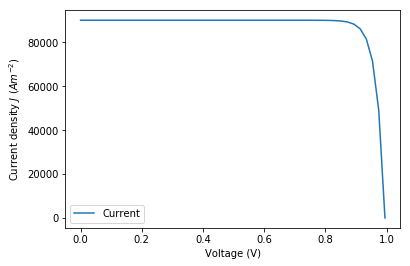

In [5]:
db.iv_curve_plot(1.1, BB_ph)

Text(0.5,1,'Spectral Irradiance')

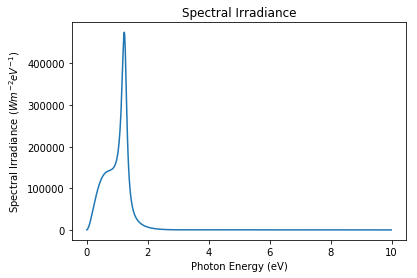

In [6]:
plt.plot(BB[:,0],BB[:,1])
plt.xlabel('Photon Energy (eV)')
plt.ylabel('Spectral Irradiance ($Wm^{-2}eV^{-1}$)')
plt.title('Spectral Irradiance')

Text(0.5,1,'Spectrum Irradiance')

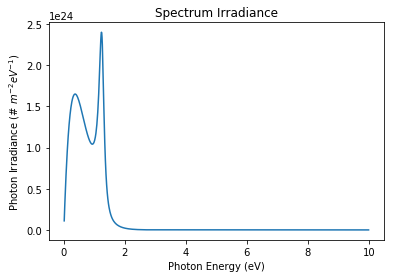

In [7]:
plt.plot(BB_ph[:,0],BB_ph[:,1] )
plt.xlabel('Photon Energy (eV)')
plt.ylabel('Photon Irradiance (# $m^{-2}eV^{-1}$)')
plt.title('Spectrum Irradiance')

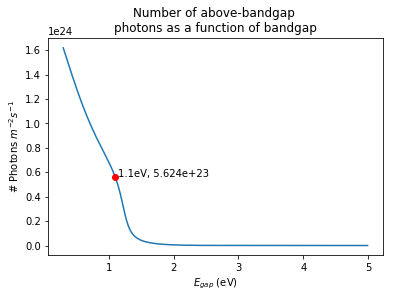

In [8]:
db.photons_above_bandgap_plot(BB_ph,E_gaps)

In [9]:
# For an ideal solar cell these will be
print('A material with a bandgap of %.2f will have an:' % Egap)
print('Ideal short circuit current: ', db.jsc(Egap, BB_ph), 'A/m^2')
print('Ideal open circuit  voltage: ', db.voc(Egap, BB_ph), 'V')


#watch out for minus 1

A material with a bandgap of 1.10 will have an:
Ideal short circuit current:  90113.36445335127 A/m^2
Ideal open circuit  voltage:  0.9949124696686207 V


In [10]:
db.recomb_rate_v(.1,BB_ph, .1)

recomb rate with correct voltage 


83539.47408806968

In [11]:
db.voc(.2, BB_ph)

0.20743271245802525

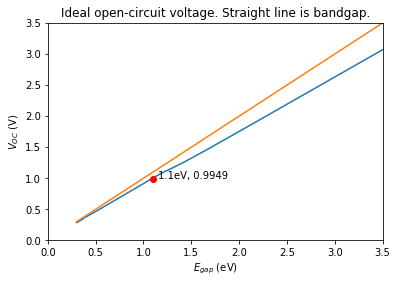

In [12]:
db.ideal_voc_plot(BB_ph,E_gaps)

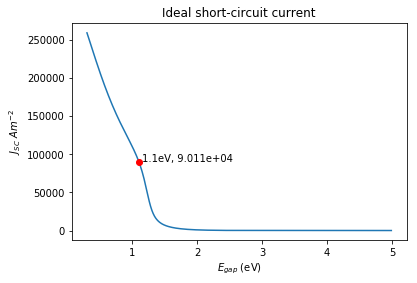

In [13]:
db.ideal_jsc_plot(BB_ph,E_gaps)

In [14]:
print('For a cell with bandgap %.2f eV' % Egap)
print('max power %.2f' % db.max_power(Egap, BB_ph) )
print('Irradiance %.2f' % db.int_irr(Egap, BB_ph ))
print('Ideal efficiency is {:.4}%'.format(db.max_eff(Egap, BB_ph)*100))

For a cell with bandgap 1.10 eV
max power 78920.31
Irradiance 241036.43
Ideal efficiency is 32.74%


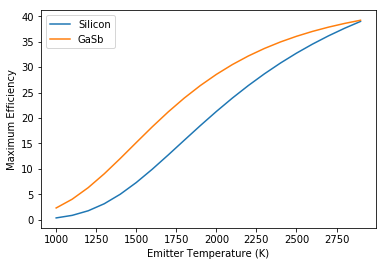

In [15]:
#generate multiple blackbody spectra


max_eff_all_Si, max_eff_all_GaSb, max_pow_all_Si,max_pow_all_GaSb = db.max_eff_temp(E_ph,1000,3000,100, constants)
#spectra_ph_all


ln1 = plt.plot(max_eff_all_Si)

ln2 = plt.plot(max_eff_all_GaSb)
lns = ln1 + ln2
plt.xlabel('Emitter Temperature (K)')
plt.ylabel('Maximum Efficiency')
plt.legend(lns, ('Silicon','GaSb'))
#plt.legend(max_eff_all_Si,'Si')

Text(0,0.5,'Emissivity')

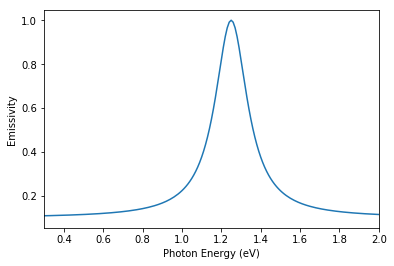

In [16]:
plt.plot(E_ph,constants['emissivity'])
plt.xlim((0.3,2))
plt.xlabel('Photon Energy (eV)')
plt.ylabel('Emissivity')

Text(0,0.5,'Maximum Power (W/m^2)')

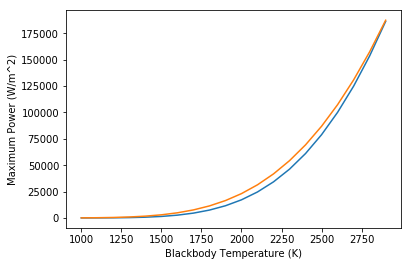

In [17]:
plt.plot(max_pow_all_Si)

plt.plot(max_pow_all_GaSb)
plt.xlabel('Blackbody Temperature (K)')
plt.ylabel('Maximum Power (W/m^2)')

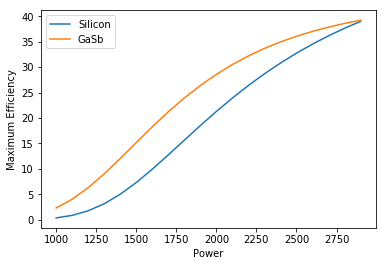

In [18]:
#generate multiple blackbody spectra now with the solid angle set to half 

import pandas as pd

max_eff_all_Si_pow, max_eff_all_GaSb_pow, max_pow_all_Si_pow,max_pow_all_GaSb_pow = db.max_eff_power(E_ph,constants)
    
ln1 = plt.plot(max_eff_all_Si)

ln2 = plt.plot(max_eff_all_GaSb)
lns = ln1 + ln2
plt.xlabel('Power')
plt.ylabel('Maximum Efficiency')
plt.legend(lns, ('Silicon','GaSb'))

Text(0,0.5,'Maximum Power (W/m^2)')

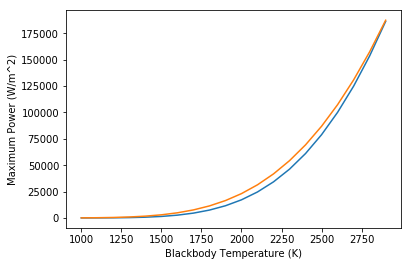

In [19]:
plt.plot(max_pow_all_Si)

plt.plot(max_pow_all_GaSb)
plt.xlabel('Blackbody Temperature (K)')
plt.ylabel('Maximum Power (W/m^2)')



In [20]:
print("Silicon cells")

print("efficiency " , max_eff_all_Si[2500])

print("power ", max_pow_all_Si[2500])
print("stephan ", db.stephan(2500))

print ("efficency from stephan" , max_pow_all_Si[2500]/db.stephan(2500)*100)

Silicon cells
efficiency  32.74206808923115
power  78920.31196373503
stephan  2214987.109375
efficency from stephan 3.5630145037730663


In [21]:
print("GaSb cells")


print("efficiency " , max_eff_all_GaSb[2500])

print("power ", max_pow_all_GaSb[2500])
print("stephan ", db.stephan(2500))

print ("efficency from stephan" , max_pow_all_GaSb[2500]/db.stephan(2500)*100)

GaSb cells
efficiency  36.06167298701365
power  86921.76909269093
stephan  2214987.109375
efficency from stephan 3.9242562055910803


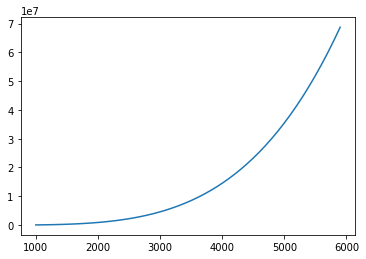

In [22]:
Temp = np.arange(1000.0, 6000.0,100.0)
Rad = np.copy(Temp)

for i in range(len(Temp)):
    Rad[i] = db.stephan(Temp[i])

plt.plot(Temp,Rad)